# In Class Exercise 8.1 - A Class for Prediction

"Prediction" in Data Science very roughly means any technique that takes known data and produces a guess about some unknown data.

To practice defining classes and to prepare for the upcoming assignment, this exercise will have you create a class to do prediction *very badly*.  The later assignment will involve creating a class for performing [simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression), a *good* method for basic modeling and prediction, but we can get there in due time.

 * Relevant textbook chapter: [Chapter 8: Classes (Defining New Kinds of Objects)](https://snakebear.science/08-Classes/toctree.html)

Overall, the goal here is to create a class will let us create an object that, when given a dataframe and two column labels, can make predictions (possibly bad ones, in this case).  Each prediction will be a possible value for the second column given a value for the first column.  For ease and consistency of reference, we will call these columns ``X`` and ``Y``, respectively.

For example, if we had data on a group of people's heights (in inches) and weights (in pounds), then we might give our predictor that data, set ``X`` to the height column and `Y` to the weight column, and then ask it to make a prediction for a person's weight if their height is 72 [inches, which is 6 feet tall].  It might return a prediction like 190 [pounds].  Or, because this particular exercise will produce a rather poor predictor, it might return a prediction like 10 or 50000000.  Who knows?  The point here is more about working with classes than making good predictions...

***
First, we will import the usual libraries, and we will load some data we can use to test our very bad predictor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read cars.csv data to be used later
df = pd.read_csv("cars.csv")
# Print info on columns for reference
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
City mpg                   5076 non-null int64
Classification             5076 non-null object
Driveline                  5076 non-null object
Engine Type                5076 non-null object
Fuel Type                  5076 non-null object
Height                     5076 non-null int64
Highway mpg                5076 non-null int64
Horsepower                 5076 non-null int64
Hybrid                     5076 non-null bool
ID                         5076 non-null object
Length                     5076 non-null int64
Make                       5076 non-null object
Model Year                 5076 non-null object
Number of Forward Gears    5076 non-null int64
Torque                     5076 non-null int64
Transmission               5076 non-null object
Width                      5076 non-null int64
Year                       5076 non-null int64
dtypes: bool(1), int64(9), object(8)
mem

***

## Class Definition 
You will define your class in the cell below.  As you work through each step of the exercise, keep modifying the class in this cell.  Re-execute the cell each time you change the class so that the definition is changed for use and testing in later cells.

In [3]:
# Define your class here; keep updating this definition as you work through the steps below.
class BadPredictor:
    def __init__(self, data, col1, col2):
        self.df = data
        self.col1 = col1
        self.col2 = col2

    def predict(self, val):
        d1 = abs(self.df[self.col1].min() - val)
        d2 = abs(self.df[self.col1].max() - val)
        if d1 < d2:
            return self.df[self.col2].min()
        elif d2 < d1:
            return self.df[self.col2].max()
        else:
            return 42

    def plot(self, start, end):
        X = list(range(start, end))
        Y = []
        for value in X:
            new_Y = self.predict(value)
            Y.append(new_Y)
            
        plt.scatter(X, Y)
        plt.show()

## Step 1) Define a basic class

Call the class `BadPredictor`.

A "basic" version of this class should let us instantiate it (create an object) and pass in three arguments:
1. a dataframe
2. a column label (string) for the ``X`` column
3. a column label (string) for the ``Y`` column

The ``__init__()`` method should take those three values and store them inside the new object as attributes.  These attributes will be the initial data the object stores or "knows."  It will eventually use these attributes to perform its predictions, but for now, it should just store them when it is created.

**Remember:** Define the class in the cell designated for this earlier.

### Testing

The code cell below contains a simple test.  It creates an instance of the `BadPredictor` class (an object of that type) and prints out its type.  It should print `<class '__main__.BadPredictor'>`.

**Note:** Later tests use this `bp` object again.  If you change the class definition, you will need to re-execute this cell to re-create `bp` with the new definition.

In [4]:
# Test whether the class can be instantiated.
bp = BadPredictor(df, "Horsepower", "Torque")
print(type(bp))

<class '__main__.BadPredictor'>


For a further test, write some code in the cell below to verify that the `bp` object created in the test above contains attributes with the three values passed into the constructor.  Use dot notation on the `bp` object to access each attribute, and print them out (or otherwise verify that they exist and have the expected values).

In [5]:
# Test whether the bp object contains three attributes with the values given in the constructor above.
print(bp.df.shape)
print(bp.col1)
print(bp.col2)

(5076, 18)
Horsepower
Torque


## Step 2) Define a prediction method

If we want this class to help us make predictions, we have to add a method.  Methods defined in an object give us ways to tell the object to do things or let us ask it questions.  In this case, we want a method that let's us ask the question, "What is the predicted value in the Y column I specified if the value in the X column is [val]?" where [val] is some number.

Given the way `bp` was constructed in the test above, this question would become "What is the predicted Torque value if the Horsepower value is [val]?"

Add a method named `predict()` to your class.

Note that this question involves specifying a value.  That value should be the sole **parameter** of the `predict()` method (in addition to the ``self`` parameter that should always be there, of course).  The method should **return** the value of its prediction (it is a "fruitful" method).

Now, we are aiming to make a bad prediction here, so here's how the prediction should be done.

1. The `predict()` method should compare the given value (its parameter) to the minimum and maximum values of the X column.
2. If the value is closer to the *minimum* value of the X column, return the minimum value of the Y column.
3. If the value is closer to the *maximum* value of the X column, return the maximum value of the Y column.
4. If the value is equal distance from both, return 42.

Like I said, this is a very bad way to make a prediction.  It is often very far off from a reasonable prediction.  But it is a prediction!  Just a bad one.  Very bad.

### Testing

Test the `.predict()` method by calling it several times, passing it different values each time.  If `bp` is created as in the test above, with "Horsepower" as the X column and "Torque" as the Y column, it should make the following predictions (where the value on the left is the argument and the value on the right is the return value you should get):

* [Given] 100 &rarr; [it predicts] 98
* 0 &rarr; 98
* 500 &rarr; 774
* 1000 &rarr; 774
* 369 &rarr; 42

In [6]:
# Test the prediction for different values.
for hp_val  in [100, 0, 500, 1000, 369]:
    prediction = bp.predict(hp_val)
    print("{:>4} -> {:>3}".format(hp_val, prediction))

 100 ->  98
   0 ->  98
 500 -> 774
1000 -> 774
 369 ->  42


## Step 3) Visualizing the predictions

It is often helpful to *visualize* the predictions your model makes.  This is extremely useful for quickly spotting errors or strange things you might want to investigate further.

For this type of model, predicting one value based on another, we can visualize the results in a scatterplot.  And we can make that a feature of the class itself; the class can contain a method that generates a plot visualizing the predictions it makes.

Add a method named `plot()` to your class.

The `plot()` method should take two arguments, the start and end values for a range.  It should use those values to create a set of predictions for all integer values in that range and plot them in a scatterplot.  For example, if the start value is 0 and the end value is 100, it should make predictions for X = 0, 1, 2, 3, ... up to 100, and it should plot each of those predictions with the X value on the x-axis and the predicted value on the Y-axis.

**Tips:**

 * The matplotlib `plt.scatter()` method can plot values from two lists, one for the x-axis values and one for the y-axis values.  The data doesn't have to come from a dataframe, though that is how we have used `plt.scatter()` most often.
 * You can make a list containing the integers from the start to the end value either using the `range()` function or by counting in a `for` loop and appending to a growing list.
 * You can make a list of the predicted values by calling `self.predict()` repeatedly in a for loop and appending the return values to a growing list.

When we call the `plot()` method, we are telling the object to *do* something, not asking it a question, so it does not need a return value (it is a void method).

### Testing

In code cells below, the `plot()` method by calling it with arguments `100` and `700`.

Compare the predictions in their plot to a scatterplot comparing the actual Horsepower and Torque columns in the original dataframe.  How do your predictions look?  (Expected outcome: the predictions should look pretty bad.  It's a `BadPredictor`, after all.)

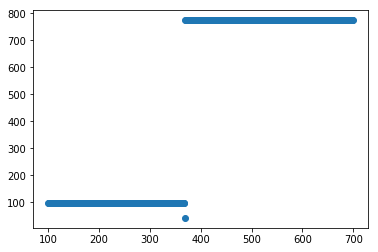

In [7]:
# Use the plot() method on the bp object to plot predictions in the range X = 100 to 700
bp.plot(100, 700)

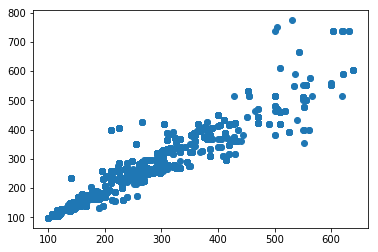

In [8]:
# Create a scatterplot comparing the Horsepower and Torque columns from the cars dataframe.
plt.scatter("Horsepower", "Torque", data=df)
plt.show()

## Part 4) Test more

Once the `.predict()` and `.plot()` methods are working, then test the `BadPredictor` class more by creating instances of it for different pairs of columns from the cars data set, and/or load data from other CSV files and create `BadPredictor` instances for columns from those files.  See how bad its predictions are across all different kinds of data!